In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:/Users/alaga/Desktop/Elutions/SuperMarket_DataSet.csv')

In [3]:
data.tail()

,Unnamed: 0,Billing_Electric_Meter_Avg_Daily KW,Lighting_Meters_Avg (daily KW),Air_Temperature_Daily_Avg,HVAC_Meters_Avg_Daily_KW,Refrigeration_Electric_Avg_Daily KW
328,25/11/2017 00:00:00,173.229167,24.998377,2.416667,17.923738,-0.006355
329,26/11/2017 00:00:00,137.512500,13.781720,4.114583,11.682986,-0.006380
330,27/11/2017 00:00:00,173.987500,24.969721,7.218750,18.282193,-0.006469
331,28/11/2017 00:00:00,169.845833,24.922763,3.833333,17.841279,-0.006380
332,29/11/2017 00:00:00,170.795833,24.937905,3.159722,17.633929,-0.006437


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
Unnamed: 0                             333 non-null object
Billing_Electric_Meter_Avg_Daily KW    333 non-null float64
Lighting_Meters_Avg (daily KW)         329 non-null float64
Air_Temperature_Daily_Avg              333 non-null float64
HVAC_Meters_Avg_Daily_KW               295 non-null float64
Refrigeration_Electric_Avg_Daily KW    291 non-null float64
dtypes: float64(5), object(1)
memory usage: 15.7+ KB


In [5]:
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(data)

Unnamed: 0 => 0.0%
Billing_Electric_Meter_Avg_Daily KW => 0.0%
Lighting_Meters_Avg (daily KW) => 1.2%
Air_Temperature_Daily_Avg => 0.0%
HVAC_Meters_Avg_Daily_KW => 11.41%
Refrigeration_Electric_Avg_Daily KW => 12.61%


In [6]:
data.describe()

,Billing_Electric_Meter_Avg_Daily KW,Lighting_Meters_Avg (daily KW),Air_Temperature_Daily_Avg,HVAC_Meters_Avg_Daily_KW,Refrigeration_Electric_Avg_Daily KW
count,333.000000,329.000000,333.000000,295.000000,291.000000
mean,204.037290,31.091078,10.934676,19.867964,41.253033
std,21.394318,6.450581,4.809461,5.770472,25.513854
min,137.512500,13.287447,-1.083333,2.845333,-0.011786
25%,188.808333,25.021719,7.988542,17.295369,30.591439
50%,206.495833,33.474672,12.000000,18.722812,49.241892
75%,216.958333,33.892039,14.458333,20.657079,56.659410
max,253.483333,49.766792,24.036458,38.605892,107.081502


In [7]:
data['Date'] = pd.to_datetime(data['Unnamed: 0'], dayfirst=True)
data.head()

,Unnamed: 0,Billing_Electric_Meter_Avg_Daily KW,Lighting_Meters_Avg (daily KW),Air_Temperature_Daily_Avg,HVAC_Meters_Avg_Daily_KW,Refrigeration_Electric_Avg_Daily KW,Date
0,1/1/2017 0:00,167.687500,NaN,4.960417,NaN,NaN,2017-01-01
1,2/1/2017 0:00,189.033333,NaN,1.034375,NaN,NaN,2017-01-02
2,3/1/2017 0:00,216.670833,NaN,0.797917,NaN,NaN,2017-01-03
3,4/1/2017 0:00,238.391667,49.766792,4.000000,22.968541,50.672500,2017-01-04
4,5/1/2017 0:00,239.583333,38.924178,-0.466667,38.605892,46.008329,2017-01-05


In [8]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data = data.set_index('Date')
data.head()

,Billing_Electric_Meter_Avg_Daily KW,Lighting_Meters_Avg (daily KW),Air_Temperature_Daily_Avg,HVAC_Meters_Avg_Daily_KW,Refrigeration_Electric_Avg_Daily KW
Date,,,,,
2017-01-01,167.687500,NaN,4.960417,NaN,NaN
2017-01-02,189.033333,NaN,1.034375,NaN,NaN
2017-01-03,216.670833,NaN,0.797917,NaN,NaN
2017-01-04,238.391667,49.766792,4.000000,22.968541,50.672500
2017-01-05,239.583333,38.924178,-0.466667,38.605892,46.008329


In [9]:
# imputing with mean
Lighting_Meters_Avg_mean_value = round(data['Lighting_Meters_Avg (daily KW)'].mean(), 2)
HVAC_Meters_Avg_Daily_KW_mean_value = round(data['HVAC_Meters_Avg_Daily_KW'].mean(), 2)
Refrigeration_Electric_Avg_Daily_KW_mean_value = round(data['Refrigeration_Electric_Avg_Daily KW'].mean(), 2)

data['Lighting_Meters_Avg (daily KW)'].fillna(Lighting_Meters_Avg_mean_value, inplace=True)
data['HVAC_Meters_Avg_Daily_KW'].fillna(HVAC_Meters_Avg_Daily_KW_mean_value, inplace=True)
data['Refrigeration_Electric_Avg_Daily KW'].fillna(Refrigeration_Electric_Avg_Daily_KW_mean_value, inplace=True)

In [10]:
data.isnull().sum()

Billing_Electric_Meter_Avg_Daily KW    0
Lighting_Meters_Avg (daily KW)         0
Air_Temperature_Daily_Avg              0
HVAC_Meters_Avg_Daily_KW               0
Refrigeration_Electric_Avg_Daily KW    0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data['Month'] =  data.index.month

In [13]:
data['Day'] =  data.index.day

In [14]:
DF = data
DF.head()

,Billing_Electric_Meter_Avg_Daily KW,Lighting_Meters_Avg (daily KW),Air_Temperature_Daily_Avg,HVAC_Meters_Avg_Daily_KW,Refrigeration_Electric_Avg_Daily KW,Month,Day
Date,,,,,,,
2017-01-01,167.687500,31.090000,4.960417,19.870000,41.250000,1,1
2017-01-02,189.033333,31.090000,1.034375,19.870000,41.250000,1,2
2017-01-03,216.670833,31.090000,0.797917,19.870000,41.250000,1,3
2017-01-04,238.391667,49.766792,4.000000,22.968541,50.672500,1,4
2017-01-05,239.583333,38.924178,-0.466667,38.605892,46.008329,1,5


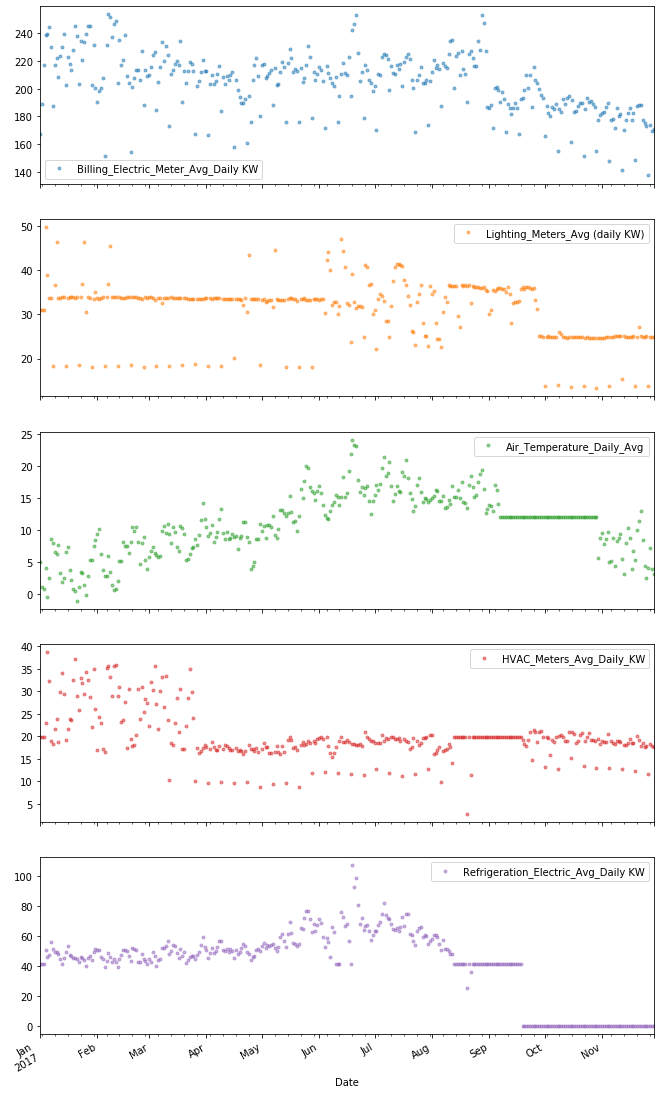

In [15]:
cols_plot = ['Billing_Electric_Meter_Avg_Daily KW', 'Lighting_Meters_Avg (daily KW)', 'Air_Temperature_Daily_Avg', 
             'HVAC_Meters_Avg_Daily_KW', 'Refrigeration_Electric_Avg_Daily KW']

axes = DF[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 21), subplots=True)


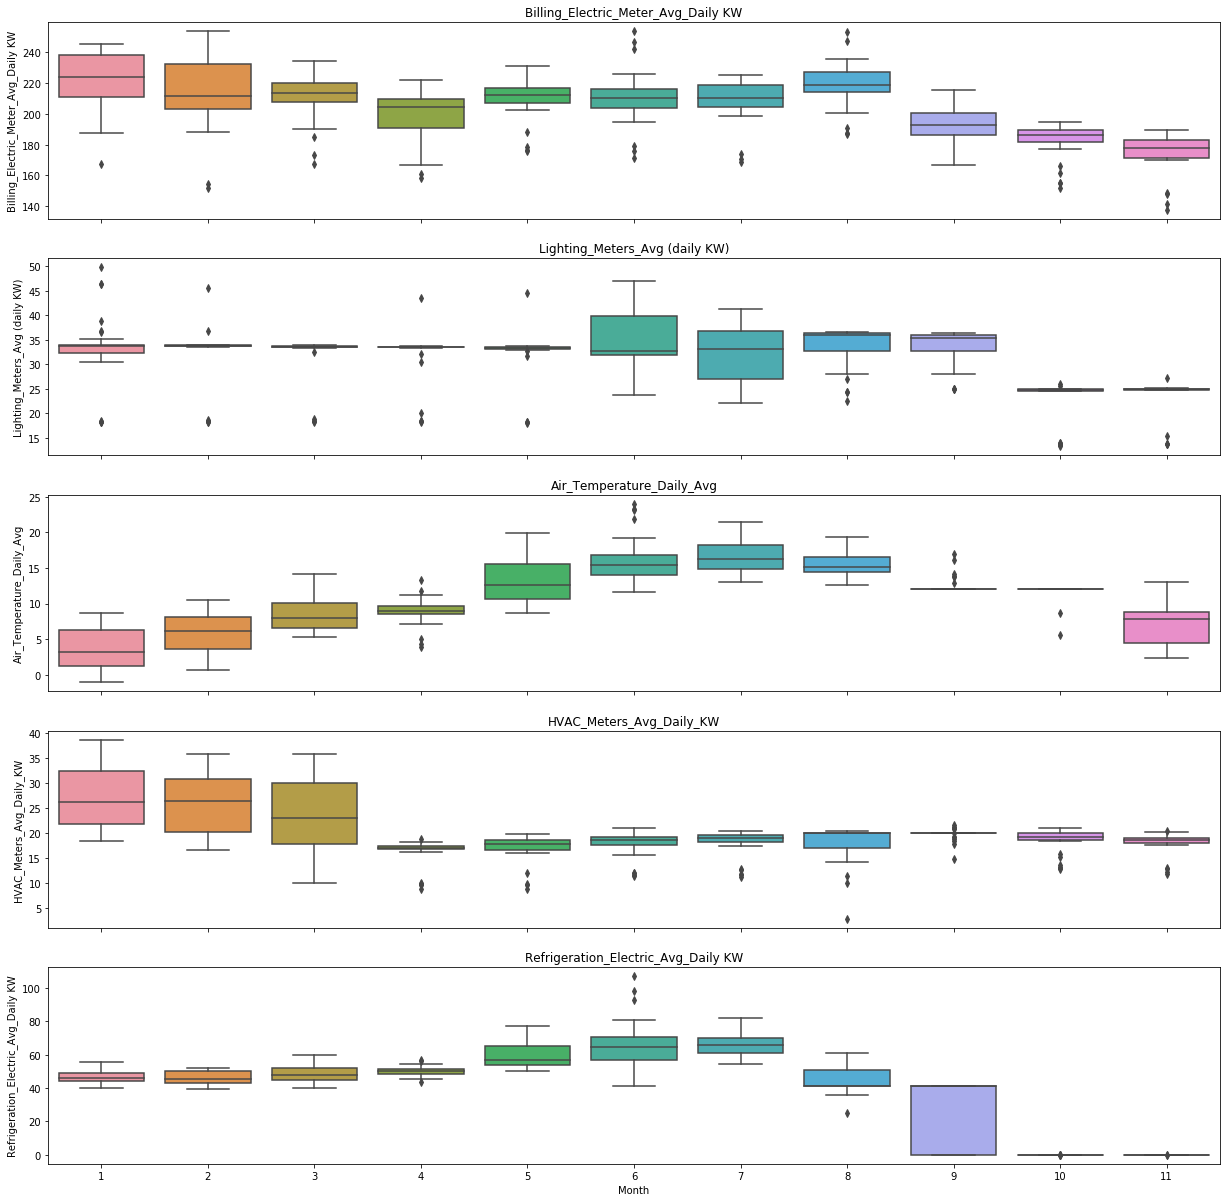

In [16]:
cols = ['Billing_Electric_Meter_Avg_Daily KW', 'Lighting_Meters_Avg (daily KW)', 'Air_Temperature_Daily_Avg', 
             'HVAC_Meters_Avg_Daily_KW', 'Refrigeration_Electric_Avg_Daily KW']

fig, axes = plt.subplots(5, 1, figsize=(21, 21), sharex=True)

for name, ax in zip(cols, axes):
    sns.boxplot(data=DF, x='Month', y=name, ax=ax)
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

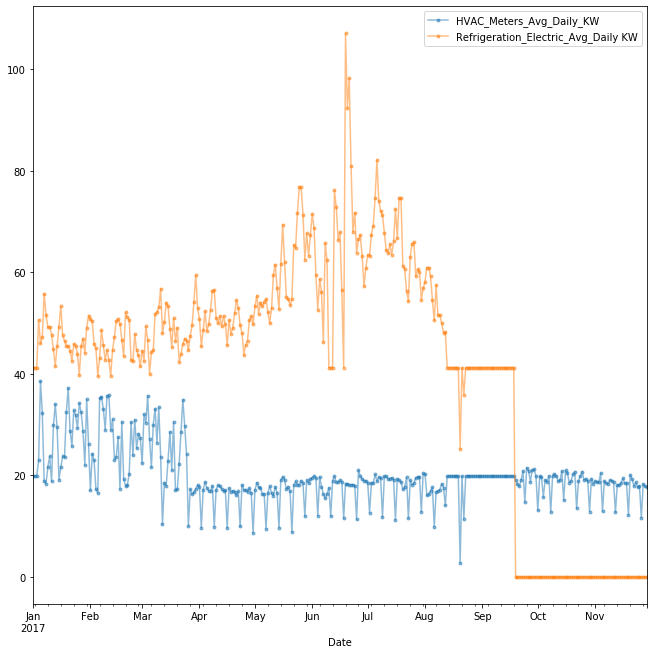

In [17]:
DF[['HVAC_Meters_Avg_Daily_KW', 'Refrigeration_Electric_Avg_Daily KW']].plot(marker='.', alpha=0.5, linestyle='-', figsize=(11, 11))